In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import torch

# 读取数据
mae_lstm = []
mae_re_lstm = []
mae_ss_lstm = []
for seed in range(100):
    try:
        mae_lstm.append(torch.load(f"loss/mae_deepar_seed{seed}.pt"))
        mae_re_lstm.append(torch.load(f"loss/mae_deepar_re_seed{seed}.pt"))
        mae_ss_lstm.append(torch.load(f"loss/mae_deepar_ss_seed{seed}.pt"))
    except:
        pass
decoder_len = 24
mae_lstm = torch.cat(mae_lstm).reshape(-1, decoder_len)
print(mae_lstm.shape)
mae_re_lstm = torch.cat(mae_re_lstm).reshape(-1, decoder_len)
mae_ss_lstm = torch.cat(mae_ss_lstm).reshape(-1, decoder_len)
mae_lstm_mean = mae_lstm.mean(-1)
mae_re_lstm_mean = mae_re_lstm.mean(-1)
mae_ss_lstm_mean = mae_ss_lstm.mean(-1)

index = [0, 7, 15, 23]
mae_lstm = mae_lstm[:, index]
mae_re_lstm = mae_re_lstm[:, index]
mae_ss_lstm = mae_ss_lstm[:, index]


torch.Size([15, 24])


In [24]:
(852.4-886.9)/886.9

-0.03889953771563874

In [32]:
(4.73 -4.84)/4.84

-0.02272727272727261

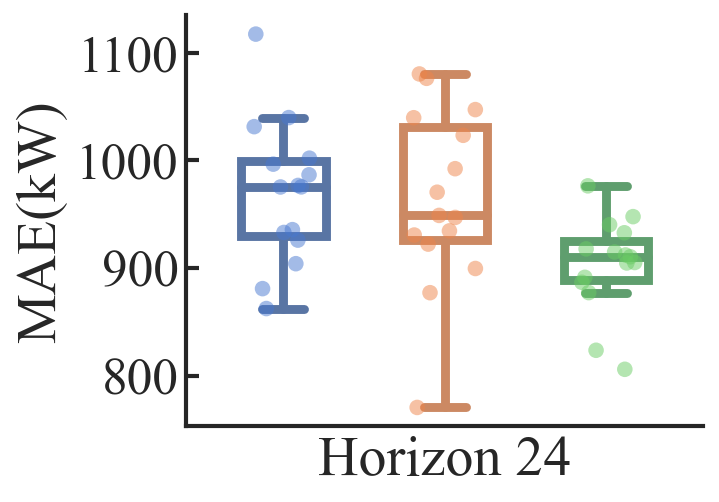

In [109]:
# 第一个Horizon
horizon = 3
mae1 = torch.stack([mae_lstm[:, horizon], mae_ss_lstm[:, horizon], mae_re_lstm[:, horizon]], 0)
# mae1 = torch.stack([mae_lstm_mean, mae_ss_lstm_mean, mae_re_lstm_mean], 0)
mae1 = np.array(mae1.reshape(-1))
maex = np.array([e for e in [1, 2, 3] for i in range(15)]).reshape(-1)
data = pd.DataFrame({
    'mae1': mae1,
    'maex': maex
})

# data = pd.DataFrame({
#     'mae1':np.tile(np.arange(0, 100), 3)/40,
#     'maex':np.repeat(np.arange(1, 4), 100)
# })

config = {
"mathtext.fontset":'stix',
"xtick.direction":"in",
"xtick.major.size": 6,
"ytick.direction":"in",
"ytick.major.size": 6,
"font.serif": ['SimSun'],
"font.family":"times new roman",
'legend.frameon':False,
}

# Apply the default theme
sns.set_theme(context='talk', style="ticks", palette=sns.color_palette("deep"), font_scale=1.4, rc=config)
fig, ax = plt.subplots(dpi=160, figsize=(5/1.2, 4/1.2))
sns.stripplot(x='maex', y='mae1', data=data, hue='maex', palette=sns.color_palette("muted")[0:3],
              alpha=.5, zorder=4, size=7, legend=False, ax=ax)
g = sns.boxplot(x='maex', y='mae1', data=data, hue='maex', linewidth=4, ax=ax)
g.legend([])
g.axes.xaxis.set_ticks([])
g.set(xlabel="Horizon 24", ylabel="MAE(kW)")
g.set_xlim([0.2, 1.8])
# g.set_ylim([-7, 5])
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

### 统计检验

In [102]:
# 
mae1 = torch.stack([mae_lstm[:, 0], mae_ss_lstm[:, 0], mae_re_lstm[:, 0]], 0)
mae2 = torch.stack([mae_lstm[:, 1], mae_ss_lstm[:, 1], mae_re_lstm[:, 1]], 0)
mae3 = torch.stack([mae_lstm[:, 2], mae_ss_lstm[:, 2], mae_re_lstm[:, 2]], 0)
mae4 = torch.stack([mae_lstm[:, 3], mae_ss_lstm[:, 3], mae_re_lstm[:, 3]], 0)

from scipy import stats
print('前向1步：EF-SS', stats.ttest_rel(mae1[2,:], mae1[1,:], ))
print('前向1步：EF-OR', stats.ttest_rel(mae1[2,:], mae1[0,:], ))
print('前向1步：SS-OR', stats.ttest_rel(mae1[1,:], mae1[0,:], ))

print('前向5步：EF-SS', stats.ttest_rel(mae2[2,:], mae2[1,:], ))
print('前向5步：EF-OR', stats.ttest_rel(mae2[2,:], mae2[0,:], ))
print('前向5步：SS-OR', stats.ttest_rel(mae2[1,:], mae2[0,:], ))

print('前向10步：EF-SS', stats.ttest_rel(mae3[2,:], mae3[1,:], ))
print('前向10步：EF-OR', stats.ttest_rel(mae3[2,:], mae3[0,:], ))
print('前向10步：SS-OR', stats.ttest_rel(mae3[1,:], mae3[0,:], ))

print('前向15步：EF-SS', stats.ttest_rel(mae4[2,:], mae4[1,:], ))
print('前向15步：EF-OR', stats.ttest_rel(mae4[2,:], mae4[0,:], ))
print('前向15步：SS-OR', stats.ttest_rel(mae4[1,:], mae4[0,:], ))

前向1步：EF-SS TtestResult(statistic=-1.033897285235511, pvalue=0.318714367904111, df=14)
前向1步：EF-OR TtestResult(statistic=-0.3368660213085721, pvalue=0.7412145328424702, df=14)
前向1步：SS-OR TtestResult(statistic=0.738559616521722, pvalue=0.4723751532466599, df=14)
前向5步：EF-SS TtestResult(statistic=-2.497900966744829, pvalue=0.02557013772191683, df=14)
前向5步：EF-OR TtestResult(statistic=-2.246183732847903, pvalue=0.04135032170798754, df=14)
前向5步：SS-OR TtestResult(statistic=0.7998983353537206, pvalue=0.43713259388759607, df=14)
前向10步：EF-SS TtestResult(statistic=-2.7664131717434013, pvalue=0.01514862396004745, df=14)
前向10步：EF-OR TtestResult(statistic=-2.864779393890049, pvalue=0.012480640904003214, df=14)
前向10步：SS-OR TtestResult(statistic=0.4410941336194986, pvalue=0.6658803244257545, df=14)
前向15步：EF-SS TtestResult(statistic=-2.791146869934613, pvalue=0.014429526285336116, df=14)
前向15步：EF-OR TtestResult(statistic=-3.3844113668280205, pvalue=0.00444872979648152, df=14)
前向15步：SS-OR TtestResult(stat

## 0.9 risk

In [115]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import torch

# 读取数据
mae_lstm = []
mae_re_lstm = []
mae_ss_lstm = []
for seed in range(100):
    try:
        mae_lstm.append(torch.load(f"loss/qloss_deepar_seed{seed}.pt"))
        mae_re_lstm.append(torch.load(f"loss/qloss_deepar_re_seed{seed}.pt"))
        mae_ss_lstm.append(torch.load(f"loss/qloss_deepar_ss_seed{seed}.pt"))
    except:
        pass
decoder_len = 24
mae_lstm = torch.cat(mae_lstm).reshape(-1, decoder_len)
print(mae_lstm.shape)
mae_re_lstm = torch.cat(mae_re_lstm).reshape(-1, decoder_len)
mae_ss_lstm = torch.cat(mae_ss_lstm).reshape(-1, decoder_len)
mae_lstm_mean = mae_lstm.mean(-1)
mae_re_lstm_mean = mae_re_lstm.mean(-1)
mae_ss_lstm_mean = mae_ss_lstm.mean(-1)

index = [0, 7, 15, 23]
mae_lstm = mae_lstm[:, index]
mae_re_lstm = mae_re_lstm[:, index]
mae_ss_lstm = mae_ss_lstm[:, index]


torch.Size([15, 24])


In [79]:
mae_lstm - mae_re_lstm

tensor([[-5.4626e+00, -5.6274e-02, -9.4923e+00, -1.1568e+01],
        [ 7.7659e+00,  1.1061e+02,  2.0237e+02,  2.4990e+02],
        [-1.1696e+01, -3.2793e+01, -4.2959e+01, -3.1339e+01],
        [-1.5550e+01, -1.2780e+00,  3.1278e+01,  4.5130e+01],
        [-1.1116e+01, -3.0276e+01, -3.3630e+01, -1.7880e+01],
        [-7.0671e+00, -1.0459e+01,  1.2772e+01,  1.8302e+01],
        [ 4.3056e-01,  4.2901e+01,  6.0026e+01,  5.3059e+01],
        [-6.5096e-01,  1.4570e+01,  3.7540e+01,  4.5249e+01],
        [ 1.8051e+00,  1.2287e+01,  1.2931e+01, -4.5342e+00],
        [-2.1858e+00,  8.6525e+00,  7.9834e+00,  5.3351e+00],
        [ 4.2392e+00,  1.0442e+00, -4.6326e+00,  5.5773e+00],
        [-4.6368e+00,  1.8271e+00, -4.5040e+00,  1.3203e+00],
        [-7.3539e+00,  1.6110e+01,  2.4370e+01,  6.7727e+00],
        [-4.1246e+00,  7.6939e+00,  1.9523e+01,  2.5010e+01],
        [-1.1130e+01,  4.3372e+00,  6.9373e+00, -2.4937e+00]])

In [76]:
torch.load(f"loss/qloss_deepar_re_seed6.pt")

tensor([214.4465, 261.6487, 284.6984, 303.6903, 318.3079, 326.5093, 337.5242,
        338.0326, 343.5404, 353.0583, 356.2495, 353.8149, 361.4067, 368.8971,
        373.9638, 374.7015, 380.9805, 383.8144, 377.3650, 380.2733, 381.8073,
        383.2275, 378.1953, 376.5472])

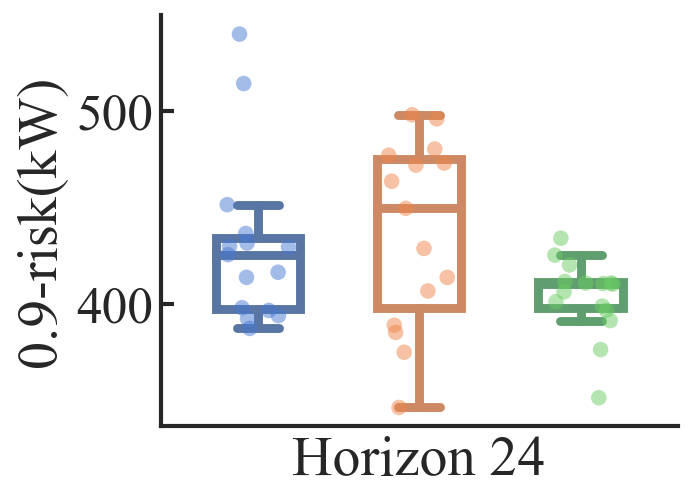

In [118]:
# 第一个Horizon
horizon = 3
mae_ss_lstm[mae_ss_lstm > 600] = 540
mae_lstm[mae_lstm > 560] = 540
mae1 = torch.stack([mae_lstm[:, horizon], mae_ss_lstm[:, horizon], mae_re_lstm[:, horizon]], 0)
# mae1 = torch.stack([mae_lstm_mean, mae_ss_lstm_mean, mae_re_lstm_mean], 0)
mae1 = np.array(mae1.reshape(-1))
maex = np.array([e for e in [1, 2, 3] for i in range(15)]).reshape(-1)
data = pd.DataFrame({
    'mae1': mae1,
    'maex': maex
})

# data = pd.DataFrame({
#     'mae1':np.tile(np.arange(0, 100), 3)/40,
#     'maex':np.repeat(np.arange(1, 4), 100)
# })

config = {
"mathtext.fontset":'stix',
"xtick.direction":"in",
"xtick.major.size": 6,
"ytick.direction":"in",
"ytick.major.size": 6,
"font.serif": ['SimSun'],
"font.family":"times new roman",
'legend.frameon':False,
}

# Apply the default theme
sns.set_theme(context='talk', style="ticks", palette=sns.color_palette("deep"), font_scale=1.4, rc=config)
fig, ax = plt.subplots(dpi=160, figsize=(5/1.2, 4/1.2))
sns.stripplot(x='maex', y='mae1', data=data, hue='maex', palette=sns.color_palette("muted")[0:3],
              alpha=.5, zorder=4, size=7, legend=False, ax=ax)
g = sns.boxplot(x='maex', y='mae1', data=data, hue='maex', linewidth=4, ax=ax)
g.legend([])
g.axes.xaxis.set_ticks([])
g.set(xlabel="Horizon 24", ylabel="0.9-risk(kW)")
g.set_xlim([0.2, 1.8])
# g.set_ylim([-7, 5])
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [117]:
# 
mae1 = torch.stack([mae_lstm[:, 0], mae_ss_lstm[:, 0], mae_re_lstm[:, 0]], 0)
mae2 = torch.stack([mae_lstm[:, 1], mae_ss_lstm[:, 1], mae_re_lstm[:, 1]], 0)
mae3 = torch.stack([mae_lstm[:, 2], mae_ss_lstm[:, 2], mae_re_lstm[:, 2]], 0)
mae4 = torch.stack([mae_lstm[:, 3], mae_ss_lstm[:, 3], mae_re_lstm[:, 3]], 0)

from scipy import stats
print('前向1步：EF-SS', stats.ttest_rel(mae1[2,:], mae1[1,:], ))
print('前向1步：EF-OR', stats.ttest_rel(mae1[2,:], mae1[0,:], ))
print('前向1步：SS-OR', stats.ttest_rel(mae1[1,:], mae1[0,:], ))

print('前向5步：EF-SS', stats.ttest_rel(mae2[2,:], mae2[1,:], ))
print('前向5步：EF-OR', stats.ttest_rel(mae2[2,:], mae2[0,:], ))
print('前向5步：SS-OR', stats.ttest_rel(mae2[1,:], mae2[0,:], ))

print('前向10步：EF-SS', stats.ttest_rel(mae3[2,:], mae3[1,:], ))
print('前向10步：EF-OR', stats.ttest_rel(mae3[2,:], mae3[0,:], ))
print('前向10步：SS-OR', stats.ttest_rel(mae3[1,:], mae3[0,:], ))

print('前向15步：EF-SS', stats.ttest_rel(mae4[2,:], mae4[1,:], ))
print('前向15步：EF-OR', stats.ttest_rel(mae4[2,:], mae4[0,:], ))
print('前向15步：SS-OR', stats.ttest_rel(mae4[1,:], mae4[0,:], ))

前向1步：EF-SS TtestResult(statistic=-0.03153325652468552, pvalue=0.9752894122970375, df=14)
前向1步：EF-OR TtestResult(statistic=2.7480241373836756, pvalue=0.01570579508552208, df=14)
前向1步：SS-OR TtestResult(statistic=1.1828439304757452, pvalue=0.25656976590632213, df=14)
前向5步：EF-SS TtestResult(statistic=-3.6318021527006583, pvalue=0.0027212880407986324, df=14)
前向5步：EF-OR TtestResult(statistic=-1.157447806283023, pvalue=0.26645601839473626, df=14)
前向5步：SS-OR TtestResult(statistic=0.9195647014303358, pvalue=0.3733732207603677, df=14)
前向10步：EF-SS TtestResult(statistic=-3.252025531572389, pvalue=0.005789326499809716, df=14)
前向10步：EF-OR TtestResult(statistic=-1.4712717030767242, pvalue=0.16333613290617882, df=14)
前向10步：SS-OR TtestResult(statistic=0.3956197099864024, pvalue=0.6983486104378114, df=14)
前向15步：EF-SS TtestResult(statistic=-3.0930355700680403, pvalue=0.00794148509382163, df=14)
前向15步：EF-OR TtestResult(statistic=-1.8420187707018882, pvalue=0.08675246217667724, df=14)
前向15步：SS-OR TtestResu